### Prerequisites


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Lasso, Ridge, ElasticNet ,LassoCV
from sklearn.model_selection import KFold , RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error


#### upload clean saved data

In [2]:
cali = pd.read_pickle("../data/main_data.pkl")
cali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_OTHER
2,-122.24,37.85,52.0,38.301436,13.784049,22.271057,13.304135,7.2574,593.380148,0,1
3,-122.25,37.85,52.0,35.693137,15.329710,23.622024,14.798649,5.6431,584.208867,0,1
4,-122.25,37.85,52.0,40.336088,16.733201,23.769729,16.093477,3.8462,584.978632,0,1
5,-122.25,37.85,52.0,30.315013,14.594520,20.322401,13.892444,4.0368,519.326487,0,1
6,-122.25,37.84,52.0,50.348784,22.113344,33.075671,22.671568,3.6591,546.991773,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,40.804412,19.339080,29.068884,18.165902,1.5603,279.463772,1,0
20636,-121.21,39.49,18.0,26.400758,12.247449,18.867962,10.677078,2.5568,277.668868,1,0
20637,-121.22,39.43,17.0,47.476310,22.022716,31.733263,20.808652,1.7000,303.809151,1,0
20638,-121.32,39.43,18.0,43.127717,20.223748,27.221315,18.681542,1.8672,291.032644,1,0


## Data splitting
- Split the data into training , validation and testing
- split data to 90 ,5,5 

In [3]:
X = cali.drop('median_house_value',axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_OTHER
2,-122.24,37.85,52.0,38.301436,13.784049,22.271057,13.304135,7.2574,0,1
3,-122.25,37.85,52.0,35.693137,15.329710,23.622024,14.798649,5.6431,0,1
4,-122.25,37.85,52.0,40.336088,16.733201,23.769729,16.093477,3.8462,0,1
5,-122.25,37.85,52.0,30.315013,14.594520,20.322401,13.892444,4.0368,0,1
6,-122.25,37.84,52.0,50.348784,22.113344,33.075671,22.671568,3.6591,0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,40.804412,19.339080,29.068884,18.165902,1.5603,1,0
20636,-121.21,39.49,18.0,26.400758,12.247449,18.867962,10.677078,2.5568,1,0
20637,-121.22,39.43,17.0,47.476310,22.022716,31.733263,20.808652,1.7000,1,0
20638,-121.32,39.43,18.0,43.127717,20.223748,27.221315,18.681542,1.8672,1,0


In [4]:
y = cali.median_house_value
y.head()

2    593.380148
3    584.208867
4    584.978632
5    519.326487
6    546.991773
Name: median_house_value, dtype: float64

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.05, random_state=10)
X_train, X_val , y_train , y_val = train_test_split(X,y, test_size=.047,random_state = 3)

## Model Training
In this section we're going to test models, Lasso , ridge ,elastcnet and Polynomial Regression with LassoCV. We'll train, tune, calculate the accuracy and finally compare the predictors

### Lasso
 - Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. 
 - The word “LASSO” stands for Least Absolute Shrinkage and Selection Operator
 - Lasso Regression uses L1 regularization technique


Lasso Model:


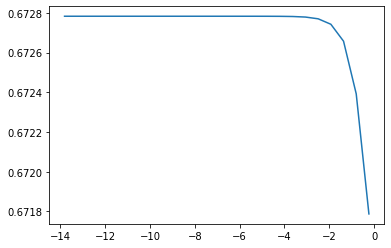

In [6]:
kfold =  RepeatedKFold(n_splits=10, n_repeats=3,random_state=1)
print("Lasso Model:")
params = {
    "alpha": np.logspace(-6, -.1, 25)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold,
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

using grid search to find best alpha

In [7]:
grid_est.best_estimator_


Lasso(alpha=0.0005060188166432624)

In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_lasso = Lasso(alpha=0.0005060188166432624)

R^2 accuracy

In [9]:
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression train R^2: {lm_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

Lasso Regression train R^2: 0.674
Lasso Regression val R^2: 0.688


MSE 

In [10]:
y_pred = lm_lasso.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
mse

4242.709786560889

RMSE

In [11]:
math.sqrt(mse)

65.13608666907223

In [12]:
# These are the (standardized) coefficients found when it refit using that best alpha
list(zip(X_train.columns, lm_lasso.coef_))

[('longitude', -63.49992468463468),
 ('latitude', -67.4533061973147),
 ('housing_median_age', 12.237601416666),
 ('total_rooms', -35.106061252466915),
 ('total_bedrooms', 67.32711383614625),
 ('population', -55.93664664756462),
 ('households', 24.80983673490453),
 ('median_income', 75.92336002345408),
 ('ocean_proximity_INLAND', -20.810763183382893),
 ('ocean_proximity_OTHER', -3.7316738401739906)]

### Plot actual vs predicted

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

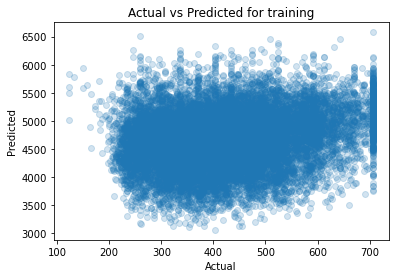

In [13]:
# Fitted vs. Actual
y_train_pred = lm_lasso.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha=0.2)
#plt.plot([0, 400], [0, 400])
plt.title('Actual vs Predicted for training')
plt.xlabel('Actual')
plt.ylabel('Predicted')


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

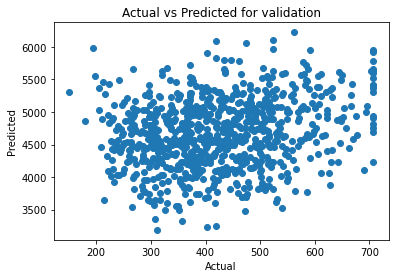

In [14]:
y_vall_pred = lm_lasso.predict(X_val)
plt.scatter(y_val, y_vall_pred)
#plt.plot([0, 400], [0, 400])
plt.title('Actual vs Predicted for validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Ridge
 - Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity
 - ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.
 - Ridge Regression is L2 regularization technique

Ridge Model:


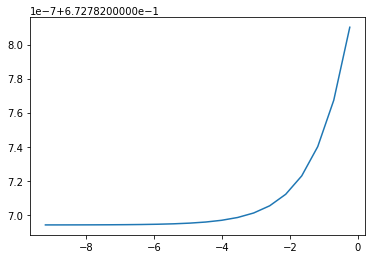

In [15]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

using grid search to find best alpha

In [16]:
grid_est.best_estimator_


Ridge(alpha=0.7943282347242815)

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)


lm_rig = Ridge(alpha=0.7943282347242815)

R^2 accuracy

In [18]:

lm_rig.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_rig.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_rig.score(X_val_scaled, y_val):.3f}')

Ridge Regression train R^2: 0.674
Ridge Regression val R^2: 0.688


MSE

In [19]:
y_pred = lm_rig.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
mse

4242.648044288968

RMSE

In [20]:
math.sqrt(mse)

65.13561271907226

In [21]:
# These are the (standardized) coefficients found when it refit using that best alpha
list(zip(X_train.columns, lm_rig.coef_))

[('longitude', -63.40591384682011),
 ('latitude', -67.3551891862575),
 ('housing_median_age', 12.237912279085482),
 ('total_rooms', -35.056355680420104),
 ('total_bedrooms', 67.23046447896748),
 ('population', -55.928171661406516),
 ('households', 24.85182415465451),
 ('median_income', 75.9057110091124),
 ('ocean_proximity_INLAND', -20.841803748946013),
 ('ocean_proximity_OTHER', -3.7255118079204714)]

### Plot actual vs predicted

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

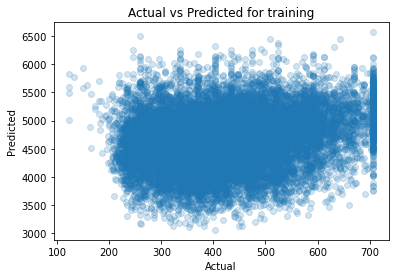

In [36]:
# Fitted vs. Actual
y_train_pred = lm_rig.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha=0.2)
 #plt.plot([0, 400], [0, 400])
plt.title('Actual vs Predicted for training')
plt.xlabel('Actual')
plt.ylabel('Predicted')

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted')

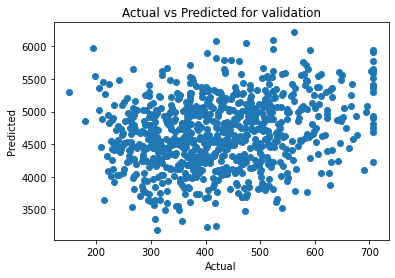

In [23]:
y_vall_pred = lm_rig.predict(X_val)
plt.scatter(y_val, y_vall_pred)
#plt.plot([0, 400], [0, 400])
plt.title('Actual vs Predicted for validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Elastic net
 -  hybrid approach, elastic net, which introduces a new parameter alpha that balances a tradeoff between L1 and L2 penalties


In [24]:

def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Elastic Net Grid Search


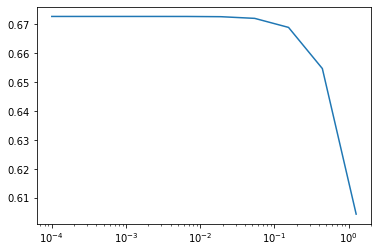

In [25]:

print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10));

In [26]:
elastic_net_grid_est.best_estimator_


ElasticNet(alpha=0.0023263050671536237)

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_elas = ElasticNet(alpha=0.0023263050671536237)

In [28]:
lm_elas.fit(X_train_scaled, y_train)
print(f'ElasticNet Regression train R^2: {lm_elas.score(X_train_scaled, y_train):.3f}')
print(f'ElasticNet Regression val R^2: {lm_elas.score(X_val_scaled, y_val):.3f}')

ElasticNet Regression train R^2: 0.674
ElasticNet Regression val R^2: 0.688


### Polynomial Regression
 -  Polynomial features are those features created by raising existing features to an exponent.
 -  polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

In [29]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)


LinearRegression()

In [30]:
print(f'Polynomial Regression train R^2: {lr_poly.score(X_train_poly,y_train):.3f}')
print(f'Polynomial Regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')

Polynomial Regression train R^2: 0.770
Polynomial Regression val R^2: 0.762


In [31]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_test_poly = poly.transform(X_test)

lr1_poly = LinearRegression()
lr1_poly.fit(X_poly,y)
print(f'Polynomial Regression train R^2: {lr1_poly.score(X_poly,y):.3f}')
print(f'Polynomial Regression test R^2: {lr1_poly.score(X_test_poly, y_test):.3f}')

Polynomial Regression train R^2: 0.770
Polynomial Regression test R^2: 0.723


MSE

In [32]:
y_pred = lr1_poly.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
mse

3756.0092352208662

RMSE

In [33]:
math.sqrt(mse)

61.28628912914263

### Plot actual vs predicted

Text(0, 0.5, 'Predicted')

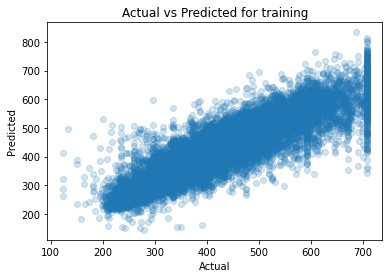

In [34]:
y_train_pred = lr1_poly.predict(X_poly)
plt.scatter(y, y_train_pred, alpha=0.2)
#plt.plot([0, 400], [0, 400])
plt.title('Actual vs Predicted for training')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

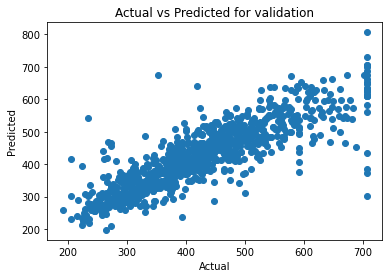

In [35]:
y_vall_pred = lr1_poly.predict(X_test_poly)
plt.scatter(y_test, y_vall_pred)
#plt.plot([0, 400], [0, 400])
plt.title('Actual vs Predicted for validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Conclusion

- regularization models all have the same accuracy
- Polynomial regression performed butter and its the one we choose to test
- it seems there is underfitting in Polynomial regression accuracy
- for more feature work we want to improve our accuracy:
  - adding more data.
  - feature ingineering.
  - train on other models.

